### 1. Overview

Tweet_dataset comprise enormous information about tweet's user opinion from residents who reside in Victoria. This 129395 records and 11 variables within tweet dataset are mainly about people's opinion in Victoria react to government's policies and their strategies which was implemented to prevent spread of virus during this global pandemic situation. 

Information such as User's ID, User's location, User's tweet, and datetime whenever they tweet is included within this dataset. The purpose of this analysis is to find out the outcome from user's opinion througth their tweet toward the government's performance, plus, analysing user's comments determines what is most likely to be topics mentioned within their tweet. As a result, through this analysis, government is able to set any appropriate strategies to handle lockdown situation in future.

To explore insight from this tweet dataset, Natural Language Toolkit (NLTK) is being used to explore and analyse the text within this dataset. Plus, there are some techniques to visualize the topic modelling and most frequent words appearing within the text. NLTK allows user to prepare textual data and explore sentiment analysis by defining positive and negative sentiment. 

Overall outcome from data analysis shows that victorians are more likely to engage with social media like tweeter to express their ideas since late 2020, and tweeter's users are increasing from time to time because of thier topic discusion. Based on their user's mentioned, more politicians/government's officiers are mainly targeted and it becomes the reason's why people tweet more. In term of sentiment analysis, there are more negative opinions toward other politicians than positive, however, Dan Andrew, who is a victoria premire, have been reviewed more positive than negative. This might shows that a lot of victorians more support with his leadership.  

<a id = "cell_exploration"></a>
### 2. Data Exploration

In [1]:
#importing some relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import os
import nltk
import re
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Lakki\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('C:\\Personal Documents\\Master of Business Analytic\\6.2021-2 Advanced AI\\Assessment 1')

In [3]:
df = pd.read_csv('Twitter_Data_VIC.csv')

In [4]:
df.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,Fri Oct 02 05:00:54 +0000 2020,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,-
1,O007paulchr,sydney australia,1.310000e+18,Sun Sep 27 06:32:09 +0000 2020,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,-
2,O007paulchr,sydney australia,1.310000e+18,Wed Sep 16 08:32:13 +0000 2020,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,-
3,O007paulchr,sydney australia,1.300000e+18,Sun Sep 06 05:45:36 +0000 2020,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP,-
4,O007paulchr,sydney australia,1.300000e+18,Tue Sep 01 10:41:13 +0000 2020,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,-


In [5]:
#checking number of records
df.shape

(129395, 11)

In [6]:
#checking missing value (N/A) is no missing value
df.isnull().sum().sort_values()

User_ID           0
User_Location     0
Tweet_ID          0
Tweet_Time        0
Tweet_Text        0
HashTag           0
Retweet_Count     0
Like_Count        0
Source            0
User_Mentioned    0
Attachment_URL    0
dtype: int64

In [7]:
#converting datetime column into datetime format 
df['Tweet_Time'] = pd.to_datetime(df['Tweet_Time'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

In [8]:
df['Tweet_Time']

0        2020-10-02 05:00:54+00:00
1        2020-09-27 06:32:09+00:00
2        2020-09-16 08:32:13+00:00
3        2020-09-06 05:45:36+00:00
4        2020-09-01 10:41:13+00:00
                    ...           
129390   2020-10-06 17:39:52+00:00
129391   2020-10-06 17:24:34+00:00
129392   2020-10-06 16:59:58+00:00
129393   2020-10-06 16:55:00+00:00
129394   2020-10-06 16:53:41+00:00
Name: Tweet_Time, Length: 129395, dtype: datetime64[ns, UTC]

In [9]:
#creating new month/day/hour columns
df['Tweet_Months'] = df['Tweet_Time'].dt.month
df['Tweet_Days'] = df['Tweet_Time'].dt.day
df['Tweet_Hours'] = df['Tweet_Time'].dt.hour

In [10]:
df[['Tweet_Time','Tweet_Months','Tweet_Days','Tweet_Hours']].head(10)

,Tweet_Time,Tweet_Months,Tweet_Days,Tweet_Hours
0,2020-10-02 05:00:54+00:00,10,2,5
1,2020-09-27 06:32:09+00:00,9,27,6
2,2020-09-16 08:32:13+00:00,9,16,8
3,2020-09-06 05:45:36+00:00,9,6,5
4,2020-09-01 10:41:13+00:00,9,1,10
5,2020-08-25 06:27:32+00:00,8,25,6
6,2020-08-17 10:34:19+00:00,8,17,10
7,2020-08-03 09:23:22+00:00,8,3,9
8,2020-07-30 23:28:06+00:00,7,30,23
9,2020-07-19 11:46:29+00:00,7,19,11


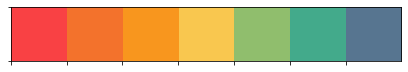

In [11]:
#defining color to use within graph
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

## QA : Number of Tweets Was Posted by Months/Days/Hours:

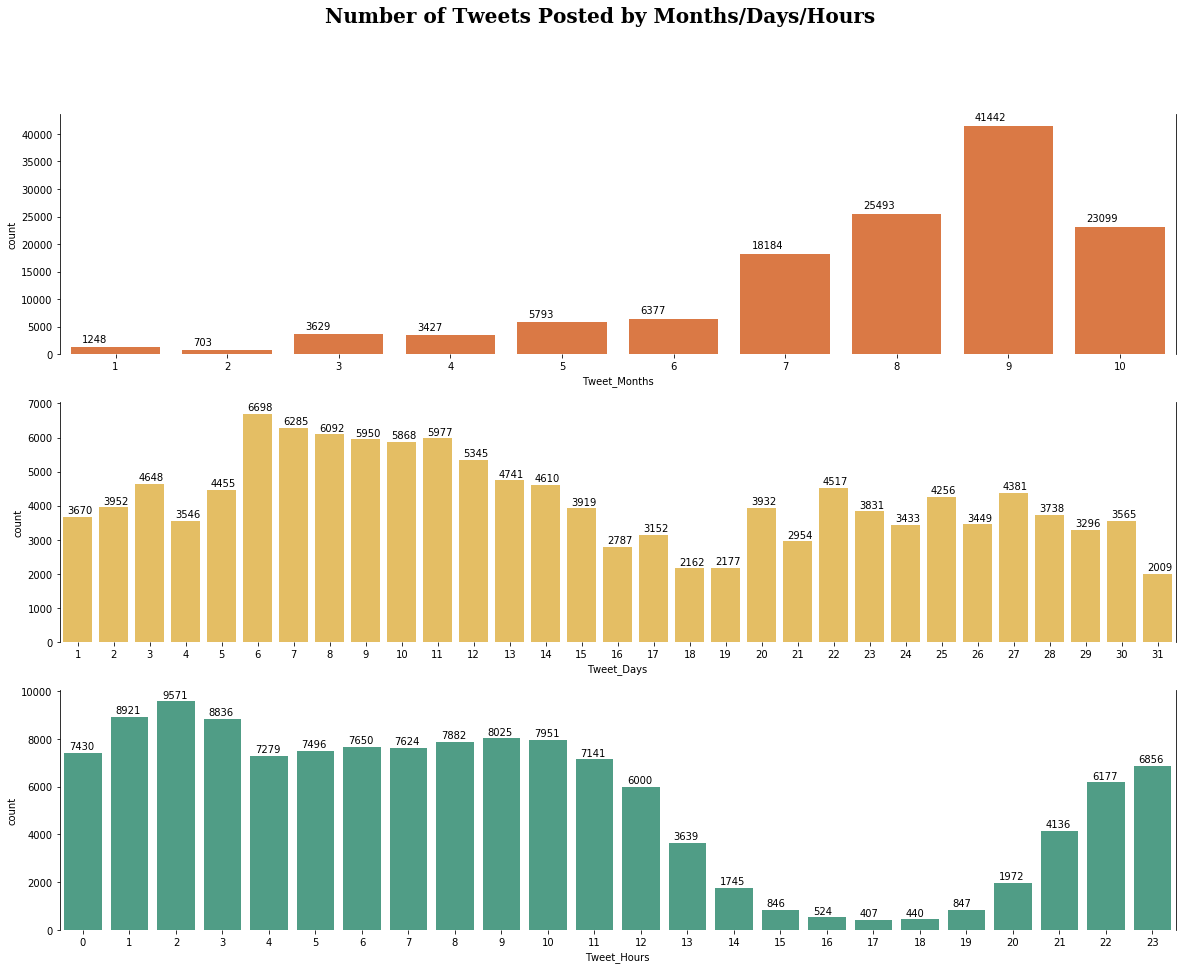

In [12]:
#plotting number of tweets within different month/day/hour by bar graph
fig = plt.figure(figsize=(20,15))
g = gs.GridSpec(3,1,figure=fig)
plt.suptitle('Number of Tweets Posted by Months/Days/Hours', family='Serif', weight='bold', size=20)
a = plt.subplot(g[0,0])
b = plt.subplot(g[1,0])
c = plt.subplot(g[2,0])

sns.countplot(df['Tweet_Months'], ax=a, color=color[1], )
sns.countplot(df['Tweet_Days'], ax=b, color=color[3])
sns.countplot(df['Tweet_Hours'], ax=c, color=color[5])

for s in ['bottom','top']:
    a.spines[s].set_visible(False)
    b.spines[s].set_visible(False)
    c.spines[s].set_visible(False)
    
for p in a.patches:
        a.annotate('{:}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+1000))
for p in b.patches:
        b.annotate('{:}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+100))
for p in c.patches:
        c.annotate('{:}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+150))

## QB : Top 10 most popular Hashtags

In [13]:
Top_Hashtag = df[(df['HashTag'] != '-') & (df['HashTag'] != 'Melbourne, Victoria')]

In [14]:
name_split = Top_Hashtag['HashTag'].str.split()
Top_Hashtag['HashTag'] = (name_split.str[0:1] + name_split.str[2:]).str.join(' ')

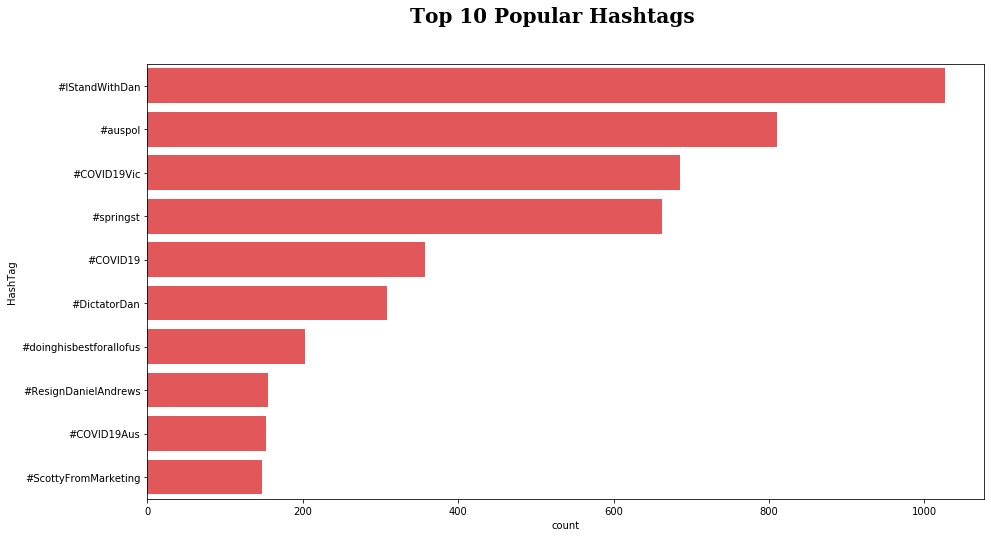

In [15]:
fig = plt.figure(figsize=(15,8))
plt.suptitle('Top 10 Popular Hashtags', family='Serif',weight='bold',size=20)
sns.countplot(data=Top_Hashtag, y='HashTag', order=Top_Hashtag['HashTag'].value_counts().iloc[0:10].index, color=color[0])
plt.show()

## QC : Top 10 Most Popular Tweeter's User Account

In [16]:
Top_Mentioned = df

In [17]:
name_split = Top_Mentioned['User_Mentioned'].str.split()
Top_Mentioned['User_Mentioned'] = (name_split.str[0:1] + name_split.str[3:]).str.join(' ')

In [18]:
Top_Mentioned.User_Mentioned.value_counts().head(15)

@DanielAndrewsMP    21541
-                   14498
@SkyNewsAust         3407
@newbury3186         1237
@MadFckingWitch      1025
@sophieelsworth       797
@DougCameron51        679
@colonelhogans        633
@macsween_prue        521
@georgiecrozier       490
@rwillingham          486
@worldoracle          473
@mjrowland68          471
@andrew_lund          441
@David_Speers         438
Name: User_Mentioned, dtype: int64

In [19]:
Top_Mentioned = Top_Mentioned[Top_Mentioned['User_Mentioned'] != '-']

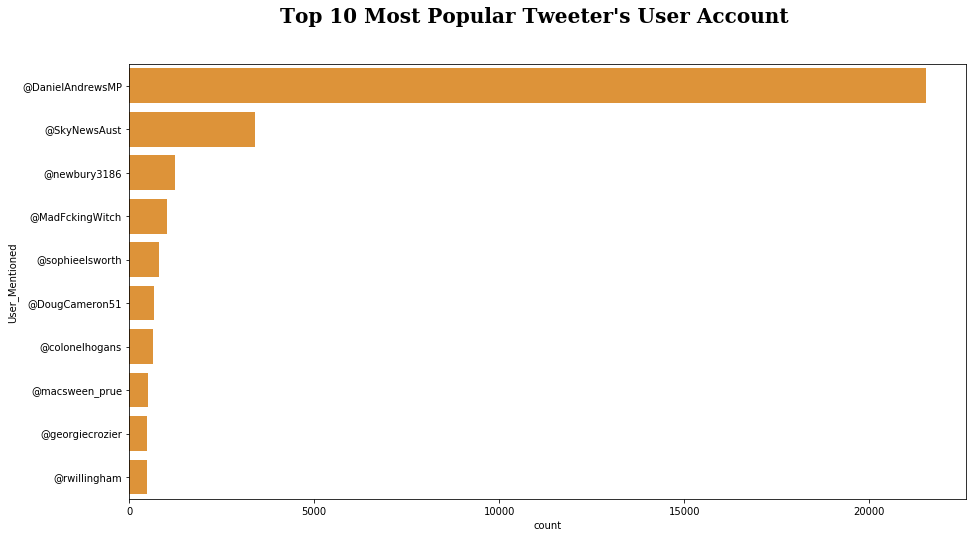

In [20]:
fig = plt.figure(figsize=(15,8))
plt.suptitle('Top 10 Most Popular Tweeter\'s User Account', family='Serif',weight='bold',size='20')
sns.countplot(data=Top_Mentioned,y='User_Mentioned', order=Top_Mentioned['User_Mentioned'].value_counts().iloc[0:10].index, color=color[2])
plt.show()

In [21]:
#Tweeter's accounts were mentioned in data
User_position = pd.DataFrame({'User_Account':['@DanielAndrewsMP','@SkyNewsAust','@newbury3186','@MadFckingWitch',
                                             '@sophieelsworth','@DougCameron51','@colonelhogans','@macsween_prue',
                                             '@georgiecrozier','@rwillingham'],
                              'Position':['Premier of Victoria','Media Company','Liberal Member of Brighton',
                                         'Political Organization','Media Writer','Former Labor Senator for NSW',
                                         'Labor Union','Television and Radio personality','Australia Politician','State Politician']})

In [22]:
#Account's user position
User_position

,User_Account,Position
0,@DanielAndrewsMP,Premier of Victoria
1,@SkyNewsAust,Media Company
2,@newbury3186,Liberal Member of Brighton
3,@MadFckingWitch,Political Organization
4,@sophieelsworth,Media Writer
5,@DougCameron51,Former Labor Senator for NSW
6,@colonelhogans,Labor Union
7,@macsween_prue,Television and Radio personality
8,@georgiecrozier,Australia Politician
9,@rwillingham,State Politician


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

## Text Preprocessing

In [23]:
!pip install nltk

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lakki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lakki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
#create new dataset called Text_Clean to store cleaned text from original dataset
Text_Clean = df

In [26]:
#function to remove symbol i.e: @,#
def clean(text):
    text=re.sub('@[\w]+','', text)
    return text
Text_Clean['Remove_@'] = Text_Clean['Tweet_Text'].apply(clean)

In [27]:
#function to remove punctuation and noise
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
Text_Clean['Clean_Punc'] = Text_Clean['Remove_@'].apply(clean)

In [28]:
#function to token text into word and make them lowercase
def token_word(text):
    token = word_tokenize(text.lower())
    return token
Text_Clean['Token_Word'] = Text_Clean['Clean_Punc'].apply(token_word)

In [29]:
#function to remove stop word such as: a, the and so on
stop_word = set(stopwords.words('English'))
def Word_stop(word):
    list_a = []
    for w in word:
        if w not in stop_word:
            list_a.append(w)
    return list_a
Text_Clean['Remove_Stopword'] = Text_Clean['Token_Word'].apply(Word_stop)

In [30]:
#function to creat POS tagging because Lemmatizing is more accurate with POS tagging
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(text)
    newlist = []
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
Text_Clean['POS_Tag'] = Text_Clean['Remove_Stopword'].apply(token_stop_pos)

In [31]:
#creating word lemmatizing based on their POS tag
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer() 
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
Text_Clean['Lemma'] = Text_Clean['POS_Tag'].apply(lemmatize)

In [32]:
Text_Clean.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL,Tweet_Months,Tweet_Days,Tweet_Hours,Remove_@,Clean_Punc,Token_Word,Remove_Stopword,POS_Tag,Lemma
0,O007paulchr,sydney australia,1.310000e+18,2020-10-02 05:00:54+00:00,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust,-,10,2,5,"What a stupid statement, he can’t be serious.",What a stupid statement he can t be serious,"[what, a, stupid, statement, he, can, t, be, s...","[stupid, statement, serious]","[(stupid, a), (statement, n), (serious, a)]",stupid statement serious
1,O007paulchr,sydney australia,1.310000e+18,2020-09-27 06:32:09+00:00,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust,-,9,27,6,"So what would you have done Rita, so quick ...",So what would you have done Rita so quick to ...,"[so, what, would, you, have, done, rita, so, q...","[would, done, rita, quick, jump, andrews, solu...","[(would, None), (done, v), (rita, v), (quick, ...",would do rita quick jump andrew solution alt...
2,O007paulchr,sydney australia,1.310000e+18,2020-09-16 08:32:13+00:00,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust,-,9,16,8,"What a load of BS, luckily Michael O’Brien ...",What a load of BS luckily Michael O Brien was...,"[what, a, load, of, bs, luckily, michael, o, b...","[load, bs, luckily, michael, brien, charge]","[(load, n), (bs, v), (luckily, r), (michael, a...",load bs luckily michael brien charge
3,O007paulchr,sydney australia,1.300000e+18,2020-09-06 05:45:36+00:00,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust,-,9,6,5,Hay Peta any comments on the current liberal...,Hay Peta any comments on the current liberal ...,"[hay, peta, any, comments, on, the, current, l...","[hay, peta, comments, current, liberal, federa...","[(hay, n), (peta, n), (comments, n), (current,...",hay peta comment current liberal federal gov...
4,O007paulchr,sydney australia,1.300000e+18,2020-09-01 10:41:13+00:00,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust,-,9,1,10,Tim who?,Tim who,"[tim, who]",[tim],"[(tim, n)]",tim


## QD : Public Sentiments Expressed toward Popular Mentioned User Account

In [33]:
#create new dataset called Sentiment_Analysis to analyse the public opinion toward political/government official.
Sentiment_Analysis = Text_Clean

In [34]:
name_split = Sentiment_Analysis['User_Mentioned'].str.split()
Sentiment_Analysis['User_Mentioned'] = (name_split.str[0:1] + name_split.str[3:]).str.join(' ')

In [35]:
#select political and government officials among top 10 users mentioned.
Sentiment_Analysis = Sentiment_Analysis[Sentiment_Analysis['User_Mentioned'].isin(['@DanielAndrewsMP','@newbury3186','@MadFckingWitch',
                                                               '@DougCameron51','@georgiecrozier','@rwillingham'])]

In [36]:
Sentiment_Analysis = Sentiment_Analysis[['User_Mentioned','Lemma']]
Sentiment_Analysis.head(5)

,User_Mentioned,Lemma
11,@MadFckingWitch,credibility
18,@MadFckingWitch,amen
30,@georgiecrozier,rt instead blame family apologise double sta...
51,@newbury3186,rt fine capital victorian issue fine since m...
52,@DanielAndrewsMP,keep punishment consistent people covid isol...


In [37]:
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    if vs['pos'] > 0.2:
        return 1
    else:
        return 0
Sentiment_Analysis['Positive'] = Sentiment_Analysis['Lemma'].apply(vadersentimentanalysis)
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    if vs['neg'] > 0.2:
        return 1
    else:
        return 0
Sentiment_Analysis['Negative'] = Sentiment_Analysis['Lemma'].apply(vadersentimentanalysis)

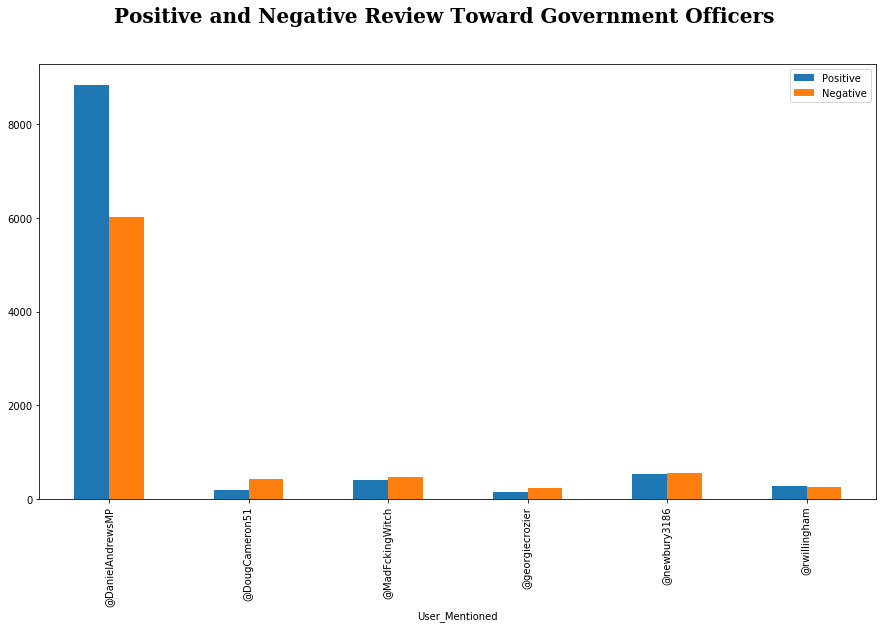

In [38]:
a = Sentiment_Analysis.groupby('User_Mentioned')['Positive','Negative'].sum()
a.plot(kind='bar', figsize=(15,8))
plt.suptitle('Positive and Negative Review Toward Government Officers', weight='bold',size=20, family='Serif')
plt.show()

## QE: Public Sentiment Change Regarding to Covid-19 case in Victoria

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

## QF: LDA 

In [39]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim 

In [40]:
LDA = Text_Clean[['User_ID','Remove_Stopword']]

In [41]:
def nouns(text):
    alist =[]
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    #tokenized = word_tokenize(str(text))
    all_nouns = [word for (word, pos) in pos_tag(text) if is_noun(pos)]
    return ' '.join(all_nouns)
LDA['Nouns'] = LDA['Remove_Stopword'].apply(nouns)

In [42]:
data = (LDA['Nouns']).values.tolist()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(data)

In [44]:
count_data

<129395x48866 sparse matrix of type '<class 'numpy.int64'>'
	with 805739 stored elements in Compressed Sparse Row format>

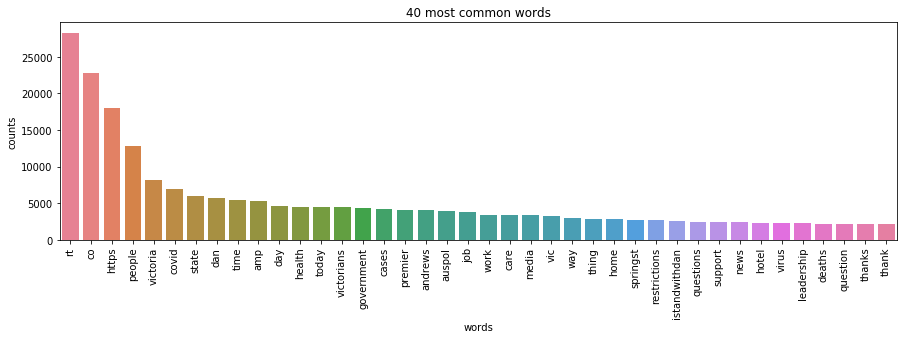

In [45]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4))
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [46]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 15000 and total_counts[t] > 100:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  1148


<129395x1148 sparse matrix of type '<class 'numpy.int64'>'
	with 510743 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 10
 
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_ 

array([[1.49099973e+02, 1.00043105e-01, 3.38467432e+01, ...,
        1.00009444e-01, 1.00004431e-01, 1.18087244e+02],
       [1.00000978e-01, 1.00004253e-01, 1.19239330e-01, ...,
        1.35581495e+02, 1.00003753e-01, 1.00007325e-01],
       [1.00003324e-01, 1.00003738e-01, 5.34544015e-01, ...,
        1.11591001e-01, 1.18099954e+02, 1.00011056e-01],
       ...,
       [1.00000677e-01, 1.74685034e-01, 3.03775100e+01, ...,
        1.00010919e-01, 1.00004757e-01, 1.00006891e-01],
       [1.00002877e-01, 1.00003408e-01, 5.18374669e+00, ...,
        1.00006215e-01, 1.00008851e-01, 1.12488100e-01],
       [1.00002754e-01, 1.00009826e-01, 6.94024530e+00, ...,
        1.00005013e-01, 1.00002053e-01, 1.00007233e-01]])

In [48]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

In [49]:
 for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
someone : 0.039
nothing : 0.030
politics : 0.023
decision : 0.023
credlin : 0.017

Topic #1:
work : 0.043
government : 0.036
state : 0.029
virus : 0.023
months : 0.022

Topic #2:
thanks : 0.045
security : 0.041
thank : 0.026
restrictions : 0.024
party : 0.022

Topic #3:
dan : 0.067
media : 0.036
questions : 0.025
police : 0.021
amp : 0.021

Topic #4:
victorians : 0.080
time : 0.045
home : 0.044
health : 0.042
care : 0.033

Topic #5:
people : 0.215
something : 0.025
leadership : 0.024
person : 0.022
masks : 0.022

Topic #6:
job : 0.060
hotel : 0.040
quarantine : 0.037
leader : 0.034
man : 0.027

Topic #7:
covid : 0.091
day : 0.075
vic : 0.051
today : 0.041
auspol : 0.029

Topic #8:
victoria : 0.091
cases : 0.065
state : 0.055
deaths : 0.035
care : 0.022

Topic #9:
way : 0.042
business : 0.033
pm : 0.025
mate : 0.023
hope : 0.021


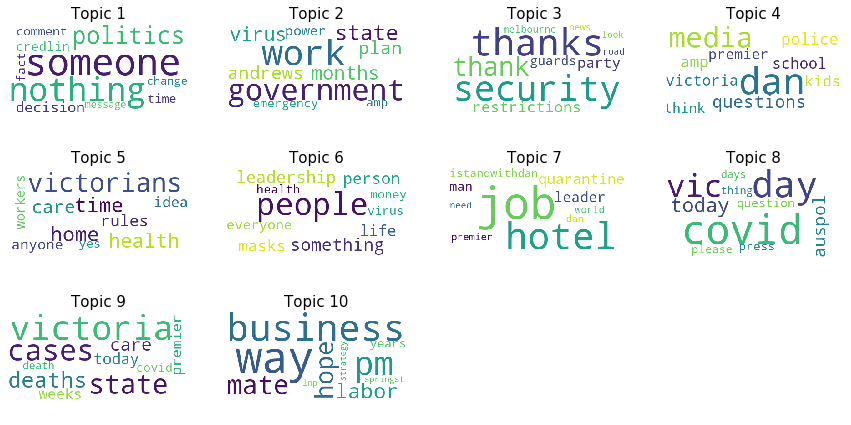

In [50]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))       
plt.show() 

In [51]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(data)):
    each_item = []
    for t in data[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 

CLEANED TEXT NEW: 


In [52]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]

In [53]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.123*"victoria" + 0.077*"cases" + 0.046*"deaths" + 0.038*"covid" + '
  '0.031*"way" + 0.029*"today" + 0.028*"people" + 0.020*"contact" + '
  '0.020*"coronavirus" + 0.020*"care"'),
 (1,
  '0.043*"labor" + 0.036*"need" + 0.029*"hey" + 0.026*"things" + '
  '0.025*"businesses" + 0.024*"home" + 0.023*"party" + 0.022*"children" + '
  '0.022*"yes" + 0.021*"evidence"'),
 (2,
  '0.099*"dan" + 0.077*"government" + 0.077*"andrews" + 0.036*"thanks" + '
  '0.024*"victorians" + 0.024*"nothing" + 0.023*"lives" + 0.019*"leader" + '
  '0.017*"plan" + 0.016*"job"'),
 (3,
  '0.053*"day" + 0.045*"questions" + 0.033*"press" + 0.028*"credlin" + '
  '0.028*"dictatordan" + 0.027*"anything" + 0.025*"media" + 0.024*"peta" + '
  '0.023*"please" + 0.023*"inquiry"'),
 (4,
  '0.094*"people" + 0.033*"everyone" + 0.026*"get" + 0.023*"dan" + '
  '0.023*"year" + 0.021*"rules" + 0.021*"country" + 0.020*"look" + '
  '0.018*"everything" + 0.017*"life"'),
 (5,
  '0.043*"health" + 0.040*"state" + 0.035*"days" + 0.0

In [54]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=Cleaned_doc_new, 
                                     dictionary=id2word, 
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.230861567643832


In [55]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.11357985292935496
Topic Number: 3 -- Coherence: 0.15423411002591278
Topic Number: 4 -- Coherence: 0.21068371356212692
Topic Number: 5 -- Coherence: 0.21887262990649203
Topic Number: 6 -- Coherence: 0.22788455525901882
Topic Number: 7 -- Coherence: 0.2290441886614906
Topic Number: 8 -- Coherence: 0.26256589106129846
Topic Number: 9 -- Coherence: 0.24973332633897685
Topic Number: 10 -- Coherence: 0.230861567643832


Text(0, 0.5, 'Coherence')

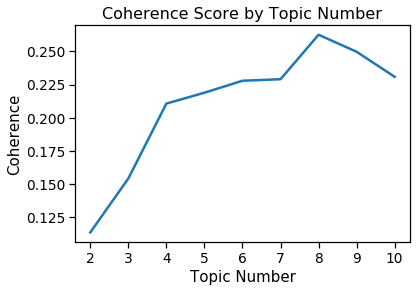

In [56]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

Recommendation:
Based on finding, there are some suggestions made as below:

1.Government should lockdown only part of infected suburbs rather than lockdown the whole state. By doing so, some people are still employed and reduce some emotional stress. By doing so, people who are not living in infected areas are able to work, run businesses and earn money so it does help not only individual but also government because government do not have to provide neither finicial support nor metal support.

2.Government should take action on lockdown quickly rather pending till situation getting worse. If government take action immediately to shut down spreaded areas, virus can not go spread outside quickly so state can lift their lockdown early as well.

3.Government should provide more support to people who are in lockdown and make sure that all those money is delivered quickly. Every support to every victorian should be on their hand as quick as possible because people who need finicial support to pay bills and for their survival.

4.Government should take action more serious on hotel quarantined. Topic modelling shows that government were complained about hotel quarantined program which led to outbreak, thus, hotel quarantine has to be ruled carefully.

5.Government should take any approaches to make sure that people who are in isolate should practise isolation policies properly.

